# SMART CITIES - BUILDING THERMAL ENERGY MODELLING
**7 juin 2022**

- Student 1 : Louis Blanc-Teilleri
- Student 2 : David Brouillard
- Student 3 : Erwan Cabon
- Student 4 : Thomas Delassault
- Student 5 : Thomas Guillot Goguet

## Introduction

Heating and cooling in buildings accounts for one of the main sources of energy consumption worldwide. Nowadays, in a world where the global energy consumption in constantly increasing, it is important to try to limit energy consumption as much as possible. One way to do that is to increase the energy efficiency of buildings, or find ways to reduce their energy consumption. 

The objective of this project is to learn how to model and simulate the thermal energy consumption of a building. Simulations are a good way to understand how the energy in a building is consumed and are a good tool to analyze ways in which the energy efficiency could be improved.

## Description of the building

The room we will study is presented in the figure below. It consists of a room located in the corner of a building. The area of the room is 5 meters square and the ceiling is 3 meters high. The room has two exterior walls and two interior walls. The exterior walls are made of concrete and there is a layer of insulation between the concrete and the room. The interior walls are made of wood. The room also has a 1 m² window, a 2 m² door and a HVAC device.

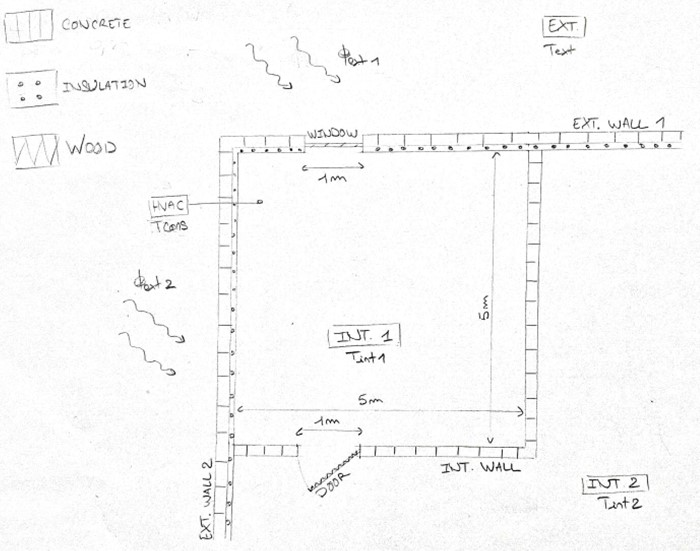
> Figure: Floor plan of the room to be studied

We will use the following material properties, taken from the document _t03Cube2wFBHere_:

<u>Concrete</u>

<img src="https://latex.codecogs.com/svg.image?\lambda&space;_{c}=2.00\;W/mK;&space;\qquad&space;w_{c}=0.20\;m;&space;\qquad&space;\rho&space;_{c}c_{c}=2.5\times&space;10^{6}\;J/Km^{2}" title="https://latex.codecogs.com/svg.image?\lambda _{c}=2.00\;W/mK; \qquad w_{c}=0.20\;m; \qquad \rho _{c}c_{c}=2.5\times 10^{6}\;J/Km^{2}" />

<u>Insulation</u>

<img src="https://latex.codecogs.com/svg.image?\lambda&space;_{i}=0.04\;W/mK;&space;\qquad&space;w_{i}=0.08\;m;&space;\qquad&space;\rho&space;_{i}c_{i}=2.0\times&space;10^{6}\;J/Km^{2}" title="https://latex.codecogs.com/svg.image?\lambda _{i}=0.04\;W/mK; \qquad w_{i}=0.08\;m; \qquad \rho _{i}c_{i}=2.0\times 10^{6}\;J/Km^{2}" />

<u>Glass</u>

<img src="https://latex.codecogs.com/svg.image?\lambda&space;_{g}=1.20\;W/mK;&space;\qquad&space;w_{g}=0.01\;m;&space;\qquad&space;\rho&space;_{g}c_{g}=2.0\times&space;10^{6}\;J/Km^{2}" title="https://latex.codecogs.com/svg.image?\lambda _{g}=1.20\;W/mK; \qquad w_{g}=0.01\;m; \qquad \rho _{g}c_{g}=2.0\times 10^{6}\;J/Km^{2}" />

## Hypothesis

To perform the building simulation, we have considered the following assumptions:

<u>Boundary Conditions</u>

- Uniform surface temperature on every wall;
- Unidirectionnal heat transfer inside every wall (length and height >> thickness);
- All heat transfers are considered linear;</p>

- Temperature of the exterior air = 25 °C;
- Desired value for the temperature of the interior air = 18 °C;
- Ambient temperature of the adjacent rooms = 20 °C

<u>Other properties</u>

- Exterior air volume flow = 4 m<sup>3</sup>/s;
- Solar radiation of each wall depends on its orientation and tilt;
- Solar radiation constant over a single wall

## Thermal Model

In order to perform the simulations, it is necessary to create a thermal model of the room. The model is built by following the heat principles:

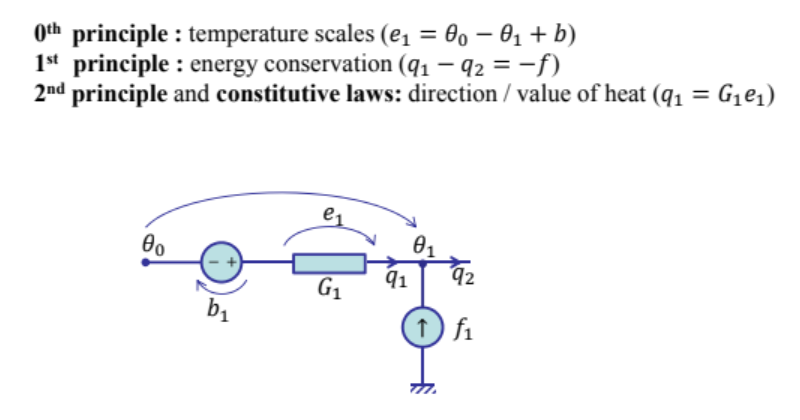
> Figure: Illustration of the heat principles

First, we identify the volumes and surfaces that have the same temperature. Then, we identify the different heat transfers taking place that are relevant to our analysis. We can divide the overall heat transfer of the room into the following heat transfers and parameters used:

<u>Conduction through the wall</u>

<u>Convection from wall to outdoor air</u>
<img src="https://latex.codecogs.com/svg.image?h_{o}=10\;W/m^{2}K" title="https://latex.codecogs.com/svg.image?h_{o}=10\;W/m^{2}K" />

<u>Convection from wall to indoor air</u>
<img src="https://latex.codecogs.com/svg.image?h_{i}=4\;W/m^{2}K" title="https://latex.codecogs.com/svg.image?h_{i}=4\;W/m^{2}K" />

The different temperatures of the room are connected by resistances along the heat transfer paths. For the thermal resistances due to convection, the value of the convection exchange coefficient h will vary depending on the temperature of the air involved. For the thermal resistances due to conduction, the value of the thermal conductivity λ will vary depending on the material and the geometry of the material.

We then add storage (capacities) and sources according to the temperature and heat flows of the room. Capacities of the system represent the material ability to absorb heat and release it later when the outside temperature is lower.

By following these principles, we obtain the following thermal model for the studied room:

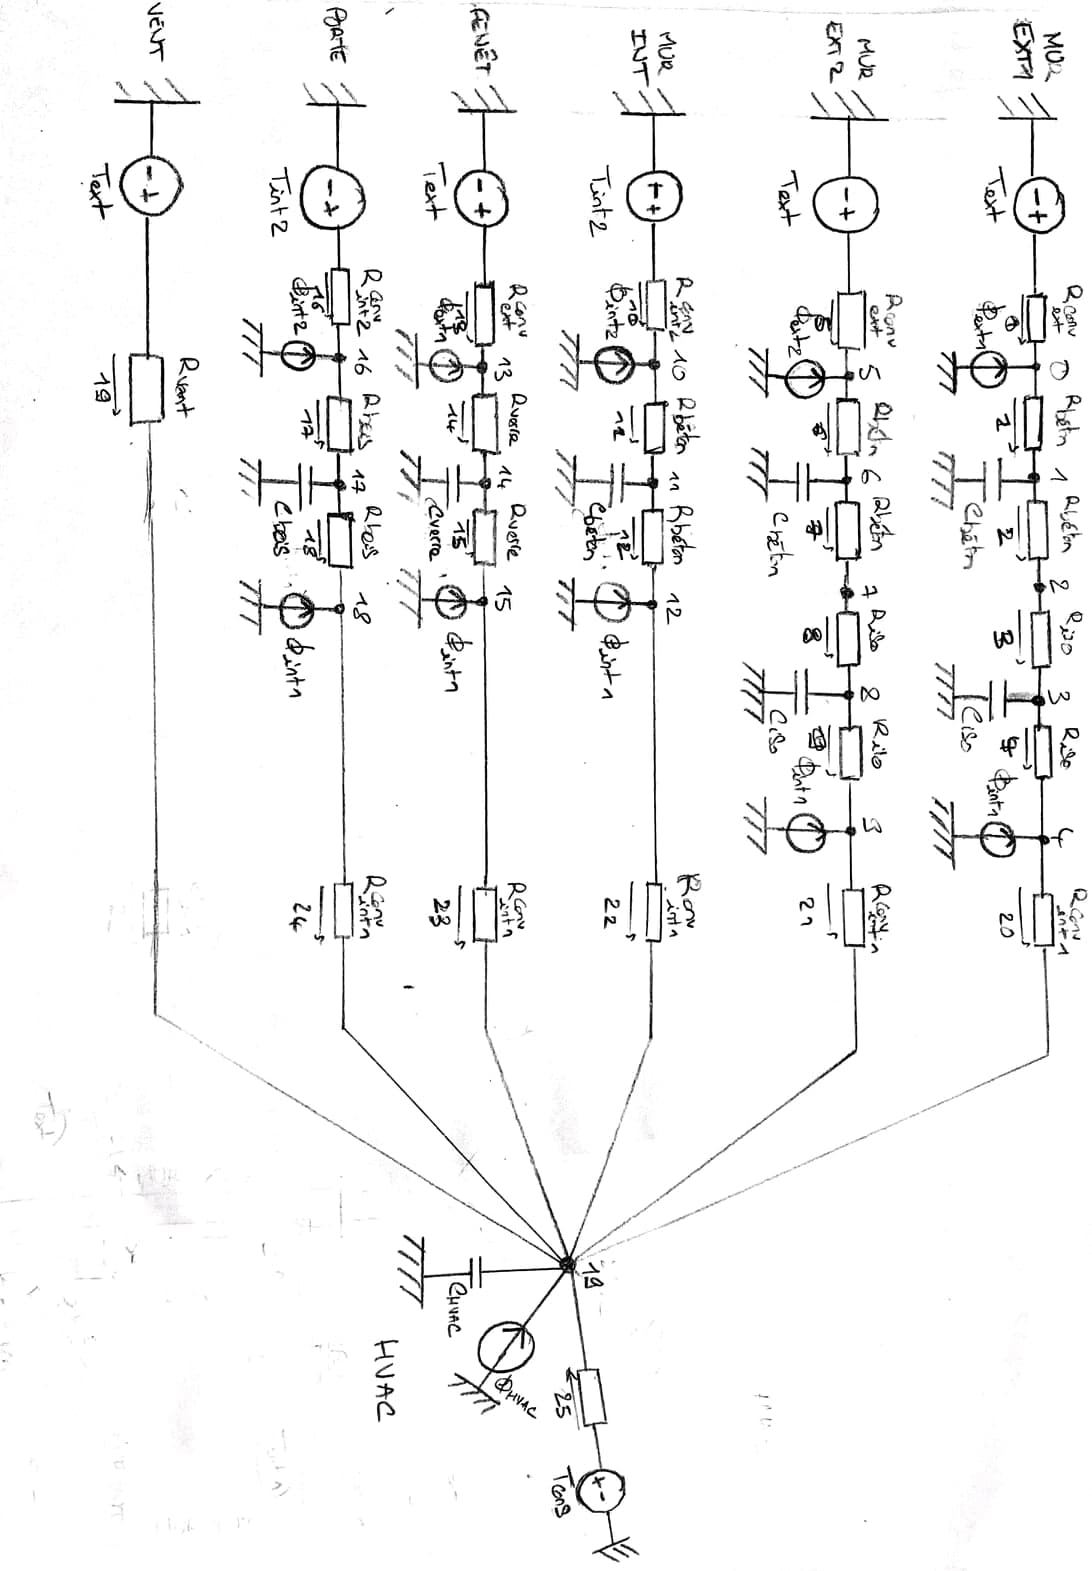
> Figure: Thermal model of the studied room

As we can see on the figure above, there is a branch for every location where a heat transfer takes place. Thus, there is a branch for the external wall, the external wall 2, the internal wall, the window, the door, the HVAC system and the vent system. Every node and every flux is properly identified with a number.

## Mathematical Model

In order to perform a simulation in Python, we need to translate our thermal model into a mathematical model. For that, we will use matrices. First, we have the A matrix, which is our state matrix. It has a number of lines equal to the number of flows and a number of columns equal to the number of nodes. It will be used to represent how flows are connected between them. If the heat enters a resistance, it will count as 1 (same direction as the flow). If the thermal flux is in the opposite direction as the flow, it will count as -1.

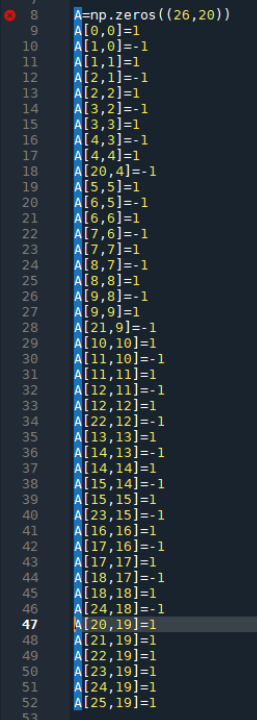
> Figure: A matrix (state matrix)

The B matrix represents all temperatures that are fixed in our model, like the outside temperature for example. If a temperature is fixed, we set the value to 1. If a temperature is not fixed, we set the value to 0.

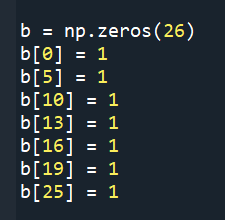
> Figure: B matrix (temperature matrix)

The G Matrix represents all the resistance values in our system. It was built as follows:

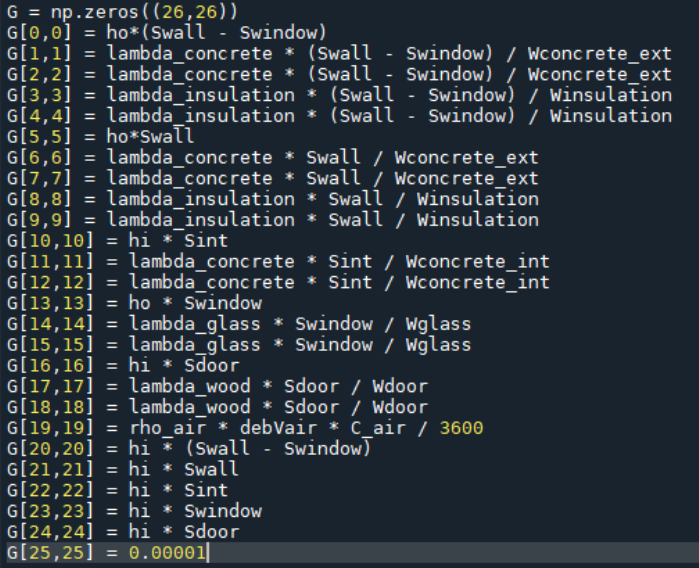
> Figure: G matrix (resistance matrix)

The C Matrix represents all the capacity values in our system. It was built as follows:

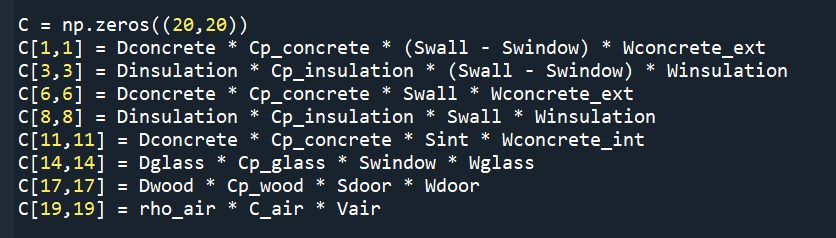
> Figure: C matrix (capacity matrix)

The matrix f represents all flux values imported that are fixed in our model, such as the absorbed incident solar radiation. If a flux is added, the value is set to 1. Otherwise, the value is set to 0.

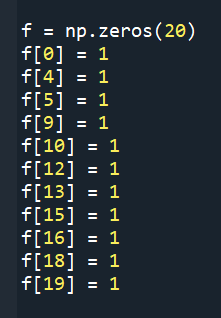
> Figure: f matrix (flux matrix)

## Steady-State Simulation Results

We can now perform a simulation for the steady-state response of our model. In this type of simulation, the temperature of the medium around the room is increased by 1 °C according to a step input. Other heat flows are not taken into account. Here is the step-response we obtain for an outside temperature of 1 °C:

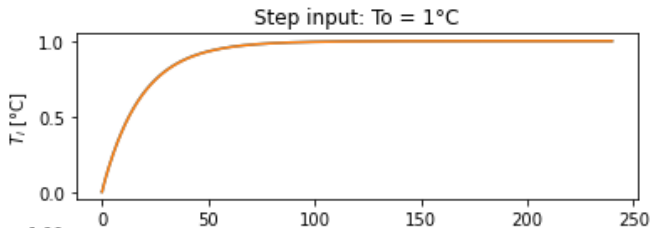
> Figure: Step-Response (To = 1 °C)

The graph above shows the temperature evolution of the room as a function of time. As expected, the temperature inside the room increases slowly up to 1 °C before stabilizing.
 
That simulation is a preliminary test to assure that the basis of our algorithm works. As we obtained the expected results, we have reasons to believe that our simulation algorithm of the evolution of temperature in the system is correct.

## Dynamic Simulation Results

For the dynamic simulation, we tried to use the sunlight data in Lyon to get the evolution of the temperature according to the variation of heat and light.

Unfortunately, our code was incompatible with the conventions taken by the teacher in his own algorithm and consequently, we were not able to simulate the influence of heat on the temperature in the room. The problem was caused by the way the inputs of the algorithm were presented (surface of the wall, conduction coefficient, etc). Thus, in order to have a succesful simulation, it would have required us to completely restructure our algorithm. We did not have enough time to achieve this.

## Conclusion

We succeeded to perform a simulation in steady state. However, this simulation does not really reflect the true behaviour of a room's temperature, since a room is rarely in steady state. Therefore, the dynamic simulation would have been more representative of a real life situation. However, the dynamic simulation would not have been perfect either, because many approximations are taken into account.

Nonetheless, simulations of that sort still remain a good tool to identify ways of improving the energy efficiency of a room or a building.